In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("./CustomerConversionPrediction.csv")

In [4]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
data.shape

(45211, 11)

In [6]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
df = data.copy(deep=True)

In [8]:
# Removing Outliers from Age Column

Q1_age = 33
Q3_age = 48
IQR_age = Q3_age-Q1_age
IQR_age

15

In [9]:
lower_limit_age = Q1_age - 1.5 * IQR_age
upper_limit_age = Q3_age + 1.5 * IQR_age

lower_limit_age, upper_limit_age

(10.5, 70.5)

In [10]:
df = df[(df['age']> lower_limit_age) & (df['age']< upper_limit_age)]
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,cellular,17,nov,266,1,unknown,yes
45205,25,technician,single,secondary,cellular,17,nov,386,2,unknown,yes
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [11]:
df.shape

(44724, 11)

In [12]:
df.describe()

,age,day,dur,num_calls
count,44724.000000,44724.000000,44724.000000,44724.000000
mean,40.545524,15.812718,257.369846,2.770682
std,9.978232,8.324820,257.428953,3.108579
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,179.000000,2.000000
75%,48.000000,21.000000,318.000000,3.000000
max,70.000000,31.000000,4918.000000,63.000000


In [13]:
# Removing Outliers from dur Column

Q1_num_calls = 1
Q3_num_calls = 3
IQR_num_calls = Q3_num_calls-Q1_num_calls
IQR_num_calls

2

In [14]:
lower_limit_num_calls = Q1_num_calls - 1.5 * IQR_num_calls
upper_limit_num_calls = Q3_num_calls + 1.5 * IQR_num_calls

lower_limit_num_calls, upper_limit_num_calls

(-2.0, 6.0)

In [15]:
df = df[(df['num_calls']> lower_limit_num_calls) & (df['num_calls']< upper_limit_num_calls)]

In [16]:
# Removing Outliers from dur Column

Q1_dur = 109
Q3_dur = 324
IQR_dur = Q3_dur-Q1_dur
IQR_dur

215

In [17]:
lower_limit_dur = Q1_dur - 1.5 * IQR_dur
upper_limit_dur = Q3_dur + 1.5 * IQR_dur

lower_limit_dur, upper_limit_dur

(-213.5, 646.5)

In [18]:
df = df[(df['dur']> lower_limit_dur) & (df['dur']< upper_limit_dur)]

In [19]:
df.describe()

,age,day,dur,num_calls
count,37491.000000,37491.000000,37491.000000,37491.000000
mean,40.489718,15.461071,209.309754,2.004828
std,10.019901,8.262992,140.201058,1.140329
min,18.000000,1.000000,0.000000,1.000000
25%,32.000000,8.000000,104.000000,1.000000
50%,39.000000,15.000000,173.000000,2.000000
75%,48.000000,21.000000,283.000000,3.000000
max,70.000000,31.000000,646.000000,5.000000


In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(37485, 11)

In [22]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [23]:
df.job.value_counts()

blue-collar      8104
management       7838
technician       6328
admin.           4470
services         3479
retired          1568
self-employed    1304
entrepreneur     1237
unemployed       1084
housemaid        1017
student           834
unknown           222
Name: job, dtype: int64

In [24]:
df.marital.value_counts()

married     22426
single      10768
divorced     4291
Name: marital, dtype: int64

In [25]:
df.education_qual.value_counts()

secondary    19467
tertiary     11000
primary       5528
unknown       1490
Name: education_qual, dtype: int64

In [26]:
df.call_type.value_counts()

cellular     24405
unknown      10988
telephone     2092
Name: call_type, dtype: int64

In [27]:
df.prev_outcome.value_counts()

unknown    30265
failure     4396
other       1549
success     1275
Name: prev_outcome, dtype: int64

In [28]:
df.y.value_counts()

no     34146
yes     3339
Name: y, dtype: int64

In [29]:
df.mon.value_counts()

may    11860
jul     5352
aug     4666
jun     4359
nov     3533
apr     2537
feb     2224
jan     1290
oct      626
sep      470
mar      401
dec      167
Name: mon, dtype: int64

In [30]:
df["Target"] = df.y.map({'yes':1, 'no':0})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,cellular,17,nov,224,1,unknown,yes,1
45203,23,student,single,tertiary,cellular,17,nov,266,1,unknown,yes,1
45205,25,technician,single,secondary,cellular,17,nov,386,2,unknown,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [31]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
Target            0
dtype: int64

# EDA

## Feature Vs Target

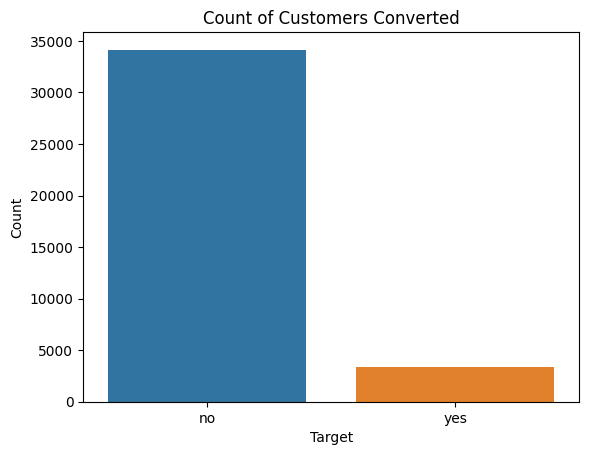

no     34146
yes     3339
Name: y, dtype: int64


In [32]:
sns.countplot(x = df.y, data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Customers Converted')
plt.show()
print(df.y.value_counts())

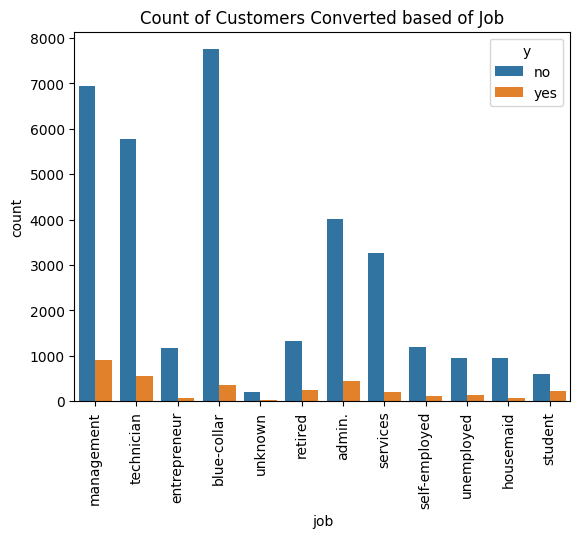

In [33]:
sns.countplot(x = df.job, data = df, hue ='y')
plt.xticks(rotation = 90)
#.mean().sort_values())
plt.title("Count of Customers Converted based of Job")
plt.show()

Text(0.5, 1.0, 'Job Vs Target')

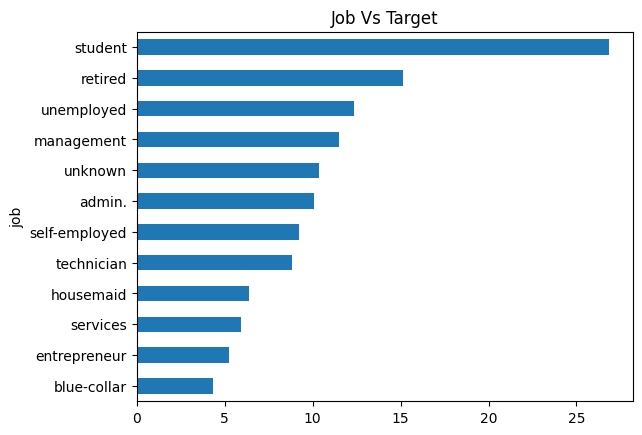

In [34]:
(df.groupby("job")["Target"].mean()*100).sort_values().plot(kind="barh")
plt.title('Job Vs Target')

Students are the most interested in Insurance Policies, followed by retired and unemployed

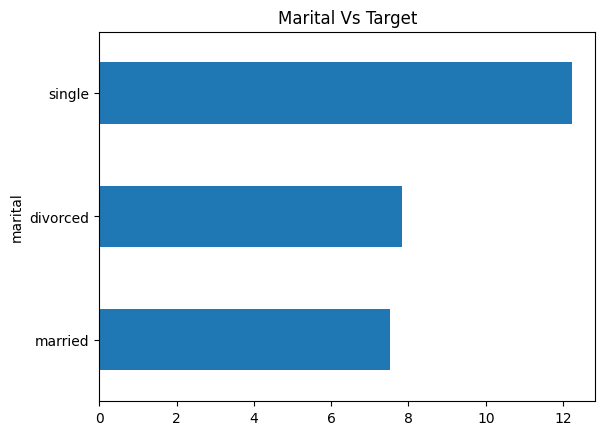

In [35]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")
plt.title('Marital Vs Target')
plt.show()

Single marital persons are the ones to be targeted followed by divorced persons

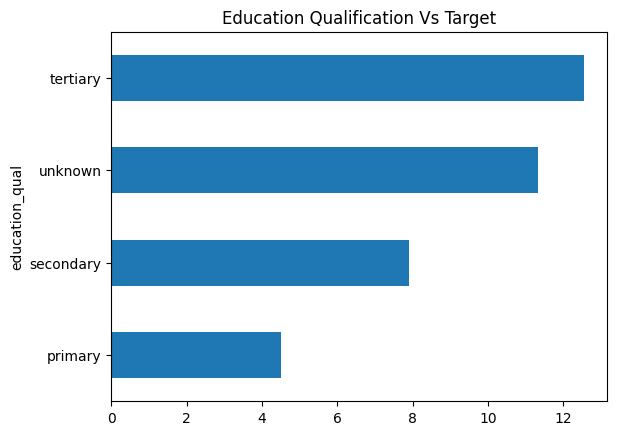

In [36]:
(df.groupby("education_qual")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Education Qualification Vs Target")
plt.show()

People with Tertiary Education should be targeted more, as most of them will be looking for employement.

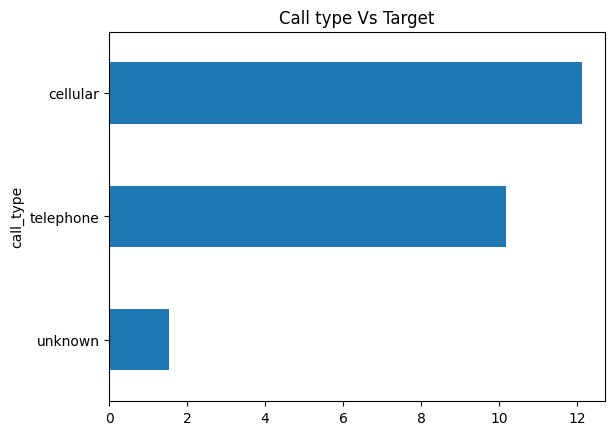

In [37]:
(df.groupby("call_type")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Call type Vs Target")
plt.show()

Cellular mode is the best way to contact customers

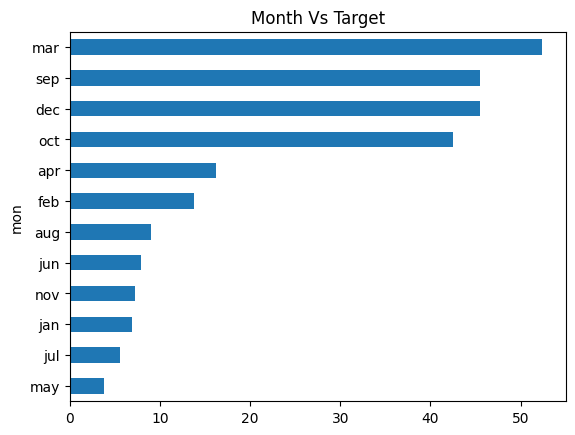

In [38]:
(df.groupby("mon")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Month Vs Target")
plt.show()

March is the ideal month for customers to take policies, as it is Financial Year Ending

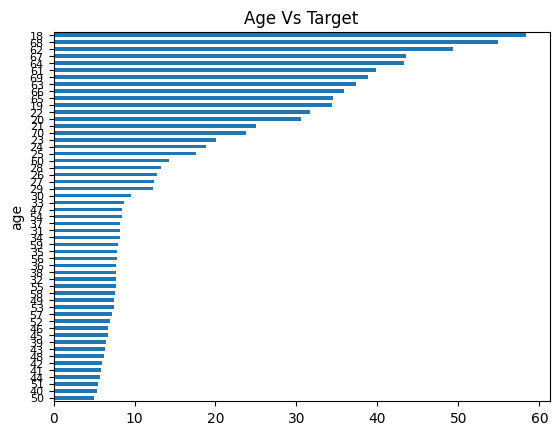

In [39]:
(df.groupby("age")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Age Vs Target")
plt.yticks(fontsize=8)
plt.show()

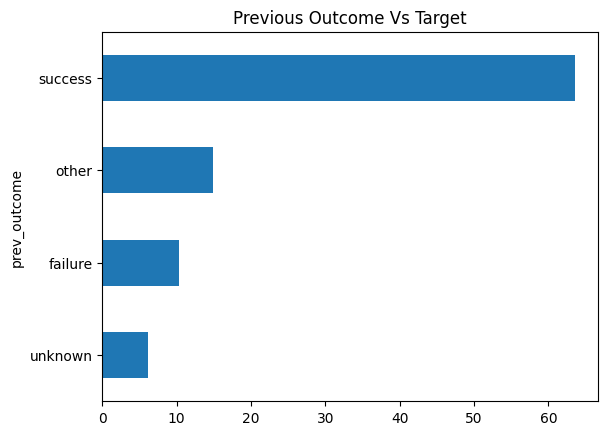

In [40]:
(df.groupby("prev_outcome")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Previous Outcome Vs Target")
#plt.yticks(fontsize=8)
plt.show()

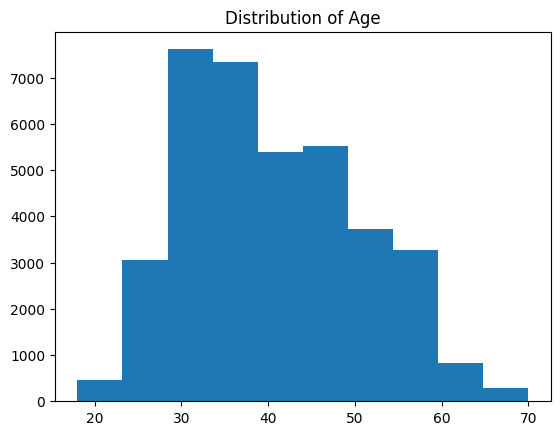

In [41]:
plt.hist(x = df['age'])
plt.title("Distribution of Age")
plt.show()

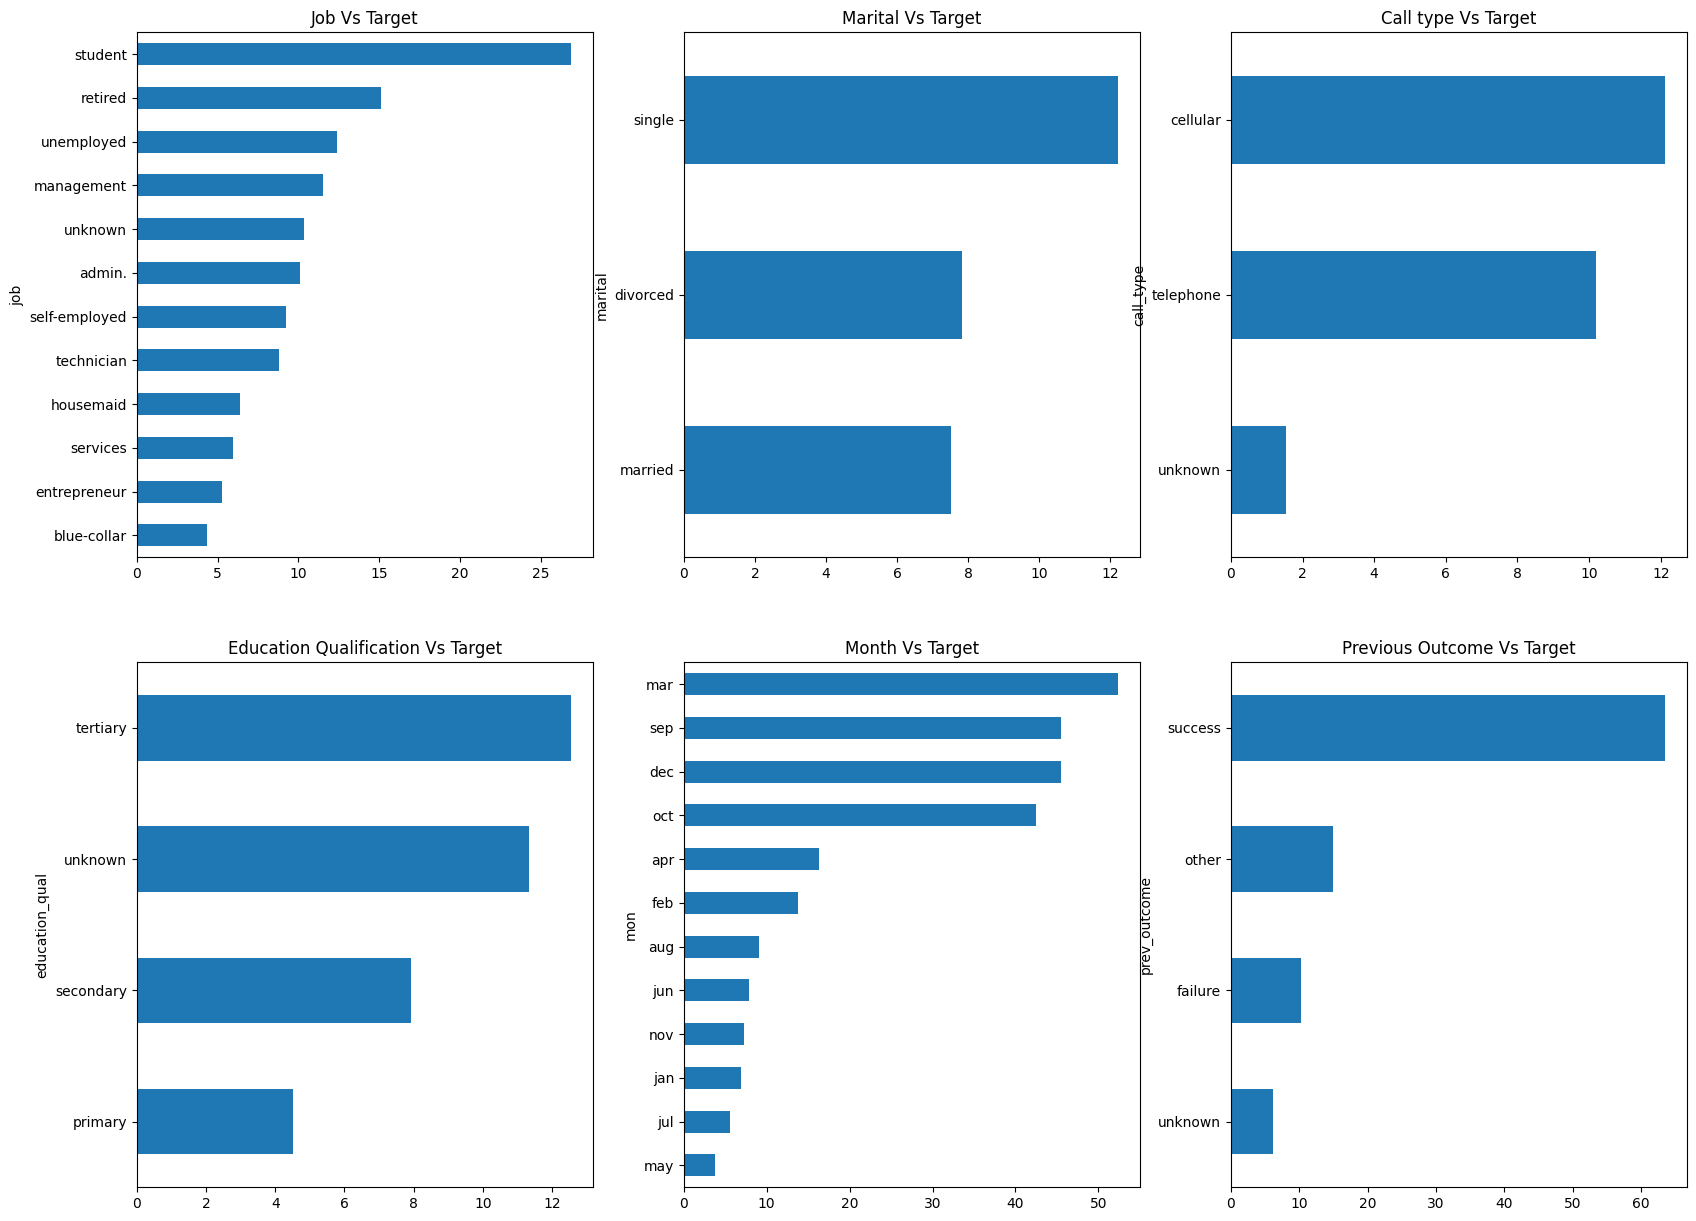

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [42]:
plt.figure(figsize = (20,15))

plt.subplot(231)
(df.groupby("job")["Target"].mean()*100).sort_values().plot(kind="barh")
plt.title('Job Vs Target')

plt.subplot(232)
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")
plt.title('Marital Vs Target')

plt.subplot(233)

(df.groupby("call_type")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Call type Vs Target")

plt.subplot(234)
(df.groupby("education_qual")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Education Qualification Vs Target")

plt.subplot(235)
(df.groupby("mon")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Month Vs Target")

plt.subplot(236)
(df.groupby("prev_outcome")["Target"].mean()*100).sort_values().plot(kind='barh')
plt.title("Previous Outcome Vs Target")

plt.show()
plt.tight_layout

# ENCODING

Replacing 'unknown' values from the 'job' and 'education_qual' columns. Not all unknown can be replaced.

In [43]:
df['job'] = df['job'].replace(to_replace = 'unknown', value = np.nan)
df['education_qual'] = df['education_qual'].replace(to_replace = 'unknown', value = np.nan)

In [44]:
df.isnull().sum()

age                  0
job                222
marital              0
education_qual    1490
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
Target               0
dtype: int64

### Mapping

In [45]:
df['job'] = df['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin':6, 'management':7, 'umemployed':8, 'retired':9, 'student':10})
df['education_qual'] = df['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})
df['call_type'] = df['call_type'].map({'unknown':0, 'telephone':1, 'cellular':2})
df['mon'] = df['mon'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})

### One Hot Encoding

In [46]:
df = pd.get_dummies(df, columns = ['marital', 'prev_outcome'])
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,Target,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,7.0,2.0,0,5,5,261,1,no,0,0,1,0,0,0,0,1
1,44,4.0,1.0,0,5,5,151,1,no,0,0,0,1,0,0,0,1
2,33,1.0,1.0,0,5,5,76,1,no,0,0,1,0,0,0,0,1
3,47,0.0,NaN,0,5,5,92,1,no,0,0,1,0,0,0,0,1
4,33,NaN,NaN,0,5,5,198,1,no,0,0,0,1,0,0,0,1


In [47]:
X = df.drop(['y', 'Target'], axis =1)
y = df['Target']

### Imputing null values using KNNImputer

In [48]:
from sklearn.impute import KNNImputer

In [49]:
knn_imp = KNNImputer(n_neighbors=3)
knn_imp = knn_imp.fit_transform(X)

In [50]:
X_new = pd.DataFrame(knn_imp, columns = X.columns)
X_new

,age,job,education_qual,call_type,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,7.000000,2.000000,0.0,5.0,5.0,261.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44.0,4.000000,1.000000,0.0,5.0,5.0,151.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33.0,1.000000,1.000000,0.0,5.0,5.0,76.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,47.0,0.000000,0.333333,0.0,5.0,5.0,92.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,33.0,1.333333,1.000000,0.0,5.0,5.0,198.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,34.0,5.000000,1.000000,2.0,17.0,11.0,224.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
37481,23.0,10.000000,2.000000,2.0,17.0,11.0,266.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
37482,25.0,4.000000,1.000000,2.0,17.0,11.0,386.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
37483,57.0,0.000000,1.000000,1.0,17.0,11.0,508.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [51]:
X_new.dtypes

age                     float64
job                     float64
education_qual          float64
call_type               float64
day                     float64
mon                     float64
dur                     float64
num_calls               float64
marital_divorced        float64
marital_married         float64
marital_single          float64
prev_outcome_failure    float64
prev_outcome_other      float64
prev_outcome_success    float64
prev_outcome_unknown    float64
dtype: object

In [52]:
X_new = X_new.astype('int')

# Splitting the Data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)

# Scaling the Data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Handling Imbalanced Data with various Over Sampling Techniques

In [56]:
df.Target.value_counts()

0    34146
1     3339
Name: Target, dtype: int64

<AxesSubplot: xlabel='y', ylabel='count'>

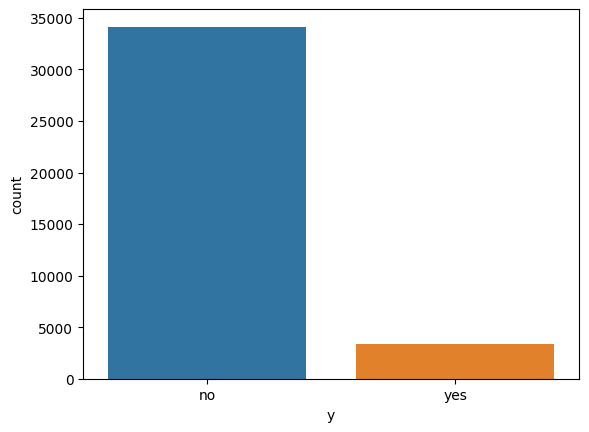

In [57]:
sns.countplot(x = df.y, data = df)

### RandomOverSampler

In [58]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train_ros, y_train_ros)
log_reg.score(x_train_ros, y_train_ros)

0.774777410859842

### SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [61]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_train_smt, y_train_smt)
log_reg2.score(x_train_smt, y_train_smt)

0.7809848263177696

### SMOTETomek

In [62]:
from imblearn.combine import SMOTETomek
smt_tom = SMOTETomek()
x_train_tom, y_train_tom = smt_tom.fit_resample(x_train, y_train)

In [63]:
log_reg3 = LogisticRegression()
log_reg3.fit(x_train_tom, y_train_tom)
log_reg3.score(x_train_tom, y_train_tom)

0.7825101758214091

### KMeansSMOTE

In [64]:
from imblearn.over_sampling import KMeansSMOTE

In [65]:
ksmt = KMeansSMOTE()
x_train_ksmt, y_train_ksmt = ksmt.fit_resample(x_train, y_train)

In [66]:
log_reg4 = LogisticRegression()
log_reg4.fit(x_train_ksmt, y_train_ksmt)
log_reg4.score(x_train_ksmt, y_train_ksmt)

0.9561927851858044

In [67]:
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

counter = Counter(y_train_ksmt)
print('After', counter)

Before Counter({0: 23923, 1: 2316})
After Counter({0: 23923, 1: 23923})


KMeansSMOTE has got the highest score among OverSampling techniques

# Model Building

Models:
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier
4. LightGBM Classifier
5. CatBoost Classifier
6. KNearest Neighbors Classifier
7. SVM

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn import metrics

### 1. Logistic Regression

In [82]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [94]:
print("Model Score:", "\n", log_model.score(x_train_ksmt, y_train_ksmt))

Model Score: 
 0.913305187476487


In [112]:
log_auc_score = metrics.roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1])
print("AUCROC Score for Logistic Regression:","\n", log_auc_score)

AUCROC Score for Logistic Regression: 
 0.8617377926778299


### 2. Random Forest Classifier

In [84]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_ksmt, y_train_ksmt)

RandomForestClassifier()

In [96]:
print("Model Score:", "\n", rf_model.score(x_train_ksmt, y_train_ksmt))

Model Score: 
 0.9999790996112528


In [113]:
rf_auc_score = metrics.roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1])
print("AUCROC Score for RandomForest Classifier:","\n", rf_auc_score)

AUCROC Score for RandomForest Classifier: 
 0.9065694255635974


## 3. XGBoost

In [86]:
from xgboost import XGBClassifier

In [87]:
xgbc = XGBClassifier()
xgbc.fit(x_train_ksmt, y_train_ksmt)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [114]:
xgbc_auc_score = metrics.roc_auc_score(y_test, xgbc.predict_proba(x_test)[:,1])
print("AUCROC Score:","\n", xgbc_auc_score)

AUCROC Score: 
 0.9033507331952015


In [97]:
print("Model Score:", "\n", xgbc.score(x_train_ksmt, y_train_ksmt))

Model Score: 
 0.9793295155289888


## 4. Light GBM

In [89]:
from lightgbm import LGBMClassifier

In [90]:
lgbmc = LGBMClassifier()
lgbmc.fit(x_train_ksmt, y_train_ksmt)

LGBMClassifier()

In [93]:
print("Model Score:", "\n", lgbmc.score(x_train_ksmt, y_train_ksmt))

Model Score: 
 0.9686285164904067


In [115]:
lgbmc_auc_score = metrics.roc_auc_score(y_test, lgbmc.predict_proba(x_test)[:,1])
print("AUCROC Score:","\n", lgbmc_auc_score)

AUCROC Score: 
 0.9232094478849897


## 5. CatGBM

In [98]:
from catboost import CatBoostClassifier

In [99]:
cbc = CatBoostClassifier()
cbc.fit(x_train_ksmt, y_train_ksmt)

Learning rate set to 0.053731
0:	learn: 0.6063867	total: 171ms	remaining: 2m 50s
1:	learn: 0.5360604	total: 196ms	remaining: 1m 37s
2:	learn: 0.4740365	total: 220ms	remaining: 1m 13s
3:	learn: 0.4195293	total: 246ms	remaining: 1m 1s
4:	learn: 0.3752619	total: 292ms	remaining: 58.1s
5:	learn: 0.3417629	total: 332ms	remaining: 55s
6:	learn: 0.3133469	total: 355ms	remaining: 50.4s
7:	learn: 0.2891803	total: 388ms	remaining: 48.1s
8:	learn: 0.2678927	total: 434ms	remaining: 47.8s
9:	learn: 0.2487390	total: 463ms	remaining: 45.8s
10:	learn: 0.2346251	total: 491ms	remaining: 44.1s
11:	learn: 0.2214437	total: 522ms	remaining: 43s
12:	learn: 0.2100089	total: 559ms	remaining: 42.4s
13:	learn: 0.2006967	total: 586ms	remaining: 41.2s
14:	learn: 0.1928987	total: 616ms	remaining: 40.4s
15:	learn: 0.1875500	total: 630ms	remaining: 38.8s
16:	learn: 0.1816538	total: 655ms	remaining: 37.9s
17:	learn: 0.1751009	total: 682ms	remaining: 37.2s
18:	learn: 0.1710095	total: 713ms	remaining: 36.8s
19:	learn: 0

161:	learn: 0.1055169	total: 4.55s	remaining: 23.5s
162:	learn: 0.1053971	total: 4.6s	remaining: 23.6s
163:	learn: 0.1052846	total: 4.64s	remaining: 23.6s
164:	learn: 0.1052094	total: 4.7s	remaining: 23.8s
165:	learn: 0.1050892	total: 4.75s	remaining: 23.9s
166:	learn: 0.1048702	total: 4.77s	remaining: 23.8s
167:	learn: 0.1047373	total: 4.8s	remaining: 23.8s
168:	learn: 0.1046511	total: 4.83s	remaining: 23.8s
169:	learn: 0.1045813	total: 4.86s	remaining: 23.7s
170:	learn: 0.1045268	total: 4.9s	remaining: 23.7s
171:	learn: 0.1043784	total: 4.96s	remaining: 23.9s
172:	learn: 0.1042572	total: 4.99s	remaining: 23.8s
173:	learn: 0.1042014	total: 5.03s	remaining: 23.9s
174:	learn: 0.1041149	total: 5.05s	remaining: 23.8s
175:	learn: 0.1040126	total: 5.07s	remaining: 23.8s
176:	learn: 0.1040046	total: 5.09s	remaining: 23.7s
177:	learn: 0.1039299	total: 5.11s	remaining: 23.6s
178:	learn: 0.1037834	total: 5.13s	remaining: 23.5s
179:	learn: 0.1036170	total: 5.16s	remaining: 23.5s
180:	learn: 0.10

320:	learn: 0.0926986	total: 8.74s	remaining: 18.5s
321:	learn: 0.0925879	total: 8.76s	remaining: 18.4s
322:	learn: 0.0925153	total: 8.8s	remaining: 18.4s
323:	learn: 0.0924404	total: 8.82s	remaining: 18.4s
324:	learn: 0.0923401	total: 8.84s	remaining: 18.4s
325:	learn: 0.0922902	total: 8.86s	remaining: 18.3s
326:	learn: 0.0922306	total: 8.88s	remaining: 18.3s
327:	learn: 0.0921766	total: 8.9s	remaining: 18.2s
328:	learn: 0.0920955	total: 8.92s	remaining: 18.2s
329:	learn: 0.0920577	total: 8.95s	remaining: 18.2s
330:	learn: 0.0919742	total: 8.97s	remaining: 18.1s
331:	learn: 0.0919333	total: 9s	remaining: 18.1s
332:	learn: 0.0918594	total: 9.03s	remaining: 18.1s
333:	learn: 0.0918016	total: 9.05s	remaining: 18s
334:	learn: 0.0917022	total: 9.06s	remaining: 18s
335:	learn: 0.0916626	total: 9.08s	remaining: 18s
336:	learn: 0.0916186	total: 9.1s	remaining: 17.9s
337:	learn: 0.0915842	total: 9.12s	remaining: 17.9s
338:	learn: 0.0915129	total: 9.14s	remaining: 17.8s
339:	learn: 0.0914762	to

482:	learn: 0.0837186	total: 12.7s	remaining: 13.6s
483:	learn: 0.0836565	total: 12.8s	remaining: 13.6s
484:	learn: 0.0836332	total: 12.8s	remaining: 13.6s
485:	learn: 0.0835692	total: 12.8s	remaining: 13.5s
486:	learn: 0.0835277	total: 12.8s	remaining: 13.5s
487:	learn: 0.0834982	total: 12.8s	remaining: 13.5s
488:	learn: 0.0834426	total: 12.9s	remaining: 13.4s
489:	learn: 0.0834084	total: 12.9s	remaining: 13.4s
490:	learn: 0.0833540	total: 12.9s	remaining: 13.4s
491:	learn: 0.0833065	total: 12.9s	remaining: 13.3s
492:	learn: 0.0832818	total: 12.9s	remaining: 13.3s
493:	learn: 0.0832478	total: 13s	remaining: 13.3s
494:	learn: 0.0831503	total: 13s	remaining: 13.2s
495:	learn: 0.0830791	total: 13s	remaining: 13.2s
496:	learn: 0.0830261	total: 13s	remaining: 13.2s
497:	learn: 0.0829909	total: 13s	remaining: 13.2s
498:	learn: 0.0829547	total: 13.1s	remaining: 13.1s
499:	learn: 0.0829005	total: 13.1s	remaining: 13.1s
500:	learn: 0.0828338	total: 13.1s	remaining: 13.1s
501:	learn: 0.0827684	

645:	learn: 0.0772702	total: 16.4s	remaining: 9s
646:	learn: 0.0772326	total: 16.5s	remaining: 8.98s
647:	learn: 0.0771399	total: 16.5s	remaining: 8.95s
648:	learn: 0.0771045	total: 16.5s	remaining: 8.92s
649:	learn: 0.0770623	total: 16.5s	remaining: 8.89s
650:	learn: 0.0770166	total: 16.5s	remaining: 8.87s
651:	learn: 0.0769957	total: 16.6s	remaining: 8.84s
652:	learn: 0.0769653	total: 16.6s	remaining: 8.81s
653:	learn: 0.0769224	total: 16.6s	remaining: 8.79s
654:	learn: 0.0768896	total: 16.6s	remaining: 8.76s
655:	learn: 0.0768437	total: 16.7s	remaining: 8.73s
656:	learn: 0.0768166	total: 16.7s	remaining: 8.71s
657:	learn: 0.0767631	total: 16.7s	remaining: 8.68s
658:	learn: 0.0767088	total: 16.7s	remaining: 8.66s
659:	learn: 0.0766712	total: 16.8s	remaining: 8.63s
660:	learn: 0.0766373	total: 16.8s	remaining: 8.6s
661:	learn: 0.0766187	total: 16.8s	remaining: 8.57s
662:	learn: 0.0765785	total: 16.8s	remaining: 8.54s
663:	learn: 0.0765229	total: 16.8s	remaining: 8.52s
664:	learn: 0.07

812:	learn: 0.0713918	total: 19.9s	remaining: 4.58s
813:	learn: 0.0713597	total: 19.9s	remaining: 4.56s
814:	learn: 0.0713438	total: 20s	remaining: 4.53s
815:	learn: 0.0713162	total: 20s	remaining: 4.5s
816:	learn: 0.0712898	total: 20s	remaining: 4.48s
817:	learn: 0.0712465	total: 20s	remaining: 4.45s
818:	learn: 0.0712025	total: 20s	remaining: 4.43s
819:	learn: 0.0711734	total: 20.1s	remaining: 4.4s
820:	learn: 0.0711370	total: 20.1s	remaining: 4.38s
821:	learn: 0.0710888	total: 20.1s	remaining: 4.35s
822:	learn: 0.0710178	total: 20.1s	remaining: 4.33s
823:	learn: 0.0709667	total: 20.1s	remaining: 4.3s
824:	learn: 0.0709559	total: 20.2s	remaining: 4.28s
825:	learn: 0.0709254	total: 20.2s	remaining: 4.25s
826:	learn: 0.0708968	total: 20.2s	remaining: 4.22s
827:	learn: 0.0708675	total: 20.2s	remaining: 4.2s
828:	learn: 0.0708325	total: 20.2s	remaining: 4.17s
829:	learn: 0.0708128	total: 20.3s	remaining: 4.15s
830:	learn: 0.0707741	total: 20.3s	remaining: 4.12s
831:	learn: 0.0707484	tota

978:	learn: 0.0665623	total: 23.6s	remaining: 507ms
979:	learn: 0.0665372	total: 23.7s	remaining: 483ms
980:	learn: 0.0665229	total: 23.8s	remaining: 460ms
981:	learn: 0.0664819	total: 23.8s	remaining: 437ms
982:	learn: 0.0664620	total: 23.9s	remaining: 413ms
983:	learn: 0.0664232	total: 24s	remaining: 390ms
984:	learn: 0.0664024	total: 24s	remaining: 366ms
985:	learn: 0.0663828	total: 24.1s	remaining: 342ms
986:	learn: 0.0663638	total: 24.1s	remaining: 318ms
987:	learn: 0.0663217	total: 24.2s	remaining: 293ms
988:	learn: 0.0662944	total: 24.2s	remaining: 269ms
989:	learn: 0.0662669	total: 24.3s	remaining: 245ms
990:	learn: 0.0662363	total: 24.3s	remaining: 221ms
991:	learn: 0.0662165	total: 24.4s	remaining: 196ms
992:	learn: 0.0662000	total: 24.4s	remaining: 172ms
993:	learn: 0.0661744	total: 24.4s	remaining: 148ms
994:	learn: 0.0661608	total: 24.5s	remaining: 123ms
995:	learn: 0.0661351	total: 24.6s	remaining: 98.7ms
996:	learn: 0.0661047	total: 24.6s	remaining: 74.1ms
997:	learn: 0.

In [100]:
print(cbc.score(x_train_ksmt, y_train_ksmt))

0.9771558750992768


In [116]:
cbc_auc_score = metrics.roc_auc_score(y_test, cbc.predict_proba(x_test)[:,1])
print("AUCROC Score:","\n", cbc_auc_score)

AUCROC Score: 
 0.9184756661540511


## 6. SVM

In [102]:
svm_model = SVC(probability=True, class_weight='balanced')
svm_model.fit(x_train_ksmt, y_train_smt)

SVC(class_weight='balanced', probability=True)

In [103]:
y_pred_svm = svm_model.predict_proba(x_test)[:,1]

In [104]:
print(svm_model.score(x_train_ksmt, y_train_ksmt))

0.9567152949044853


In [117]:
svm_auc_score = metrics.roc_auc_score(y_test, svm_model.predict_proba(x_test)[:,1])
print("AUCROC Score:","\n", svm_auc_score)

AUCROC Score: 
 0.8062094089678947


## 7. KNearest Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knc = KNeighborsClassifier()
knc.fit(x_train_ksmt,  y_train_ksmt)

KNeighborsClassifier()

In [118]:
knn_auc_score = metrics.roc_auc_score(y_test, knc.predict_proba(x_test)[:,1])
print("AUCROC Score:","\n", knn_auc_score)

AUCROC Score: 
 0.7873792721432294


#### Let us see our model accuracy in Table form

In [124]:
model_scores = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'CatGBM', 'SVM', 'KNN'],
                            'AUC_Score': [log_auc_score*100, rf_auc_score*100, xgbc_auc_score*100, lgbmc_auc_score*100, cbc_auc_score*100, svm_auc_score*100, knn_auc_score]
                           })
model_scores.sort_values(by='AUC_Score', ascending = False)

,Model,AUC_Score
3,LightGBM,92.320945
4,CatGBM,91.847567
1,Random Forest,90.656943
2,XGBoost,90.335073
0,Logistic Regression,86.173779
5,SVM,80.620941
6,KNN,0.787379


### Let's take top three Models and perform HyperParameter Tuning on them.
##### Top 3 Models:  LightGBM, CatGBM, Random Forest

### 1. HyperParameter Tuning of LightGBM Classifier

In [134]:
params_lgbmc = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [50,100,200,300],
    'num_leaves': [20,50,80,100]
}
cv = StratifiedKFold()
gcv_lgbmc = GridSearchCV(lgbmc, params_lgbmc, cv=cv, verbose=True, n_jobs=-1, scoring = 'roc_auc', error_score=0)
gcv_lgbmc.fit(x_train_ksmt, y_train_ksmt)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=0, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'n_estimators': [50, 100, 200, 300],
                         'num_leaves': [20, 50, 80, 100]},
             scoring='roc_auc', verbose=True)

In [135]:
#metrics.get_scorer_names()

In [149]:
gcv_lgbmc.best_estimator_

LGBMClassifier(n_estimators=300, num_leaves=50)

In [150]:
lgbmc_auc_score2 = metrics.roc_auc_score(y_test, gcv_lgbmc.predict_proba(x_test)[:,1])
print("AUCROC Score for Logistic Regression:","\n", lgbmc_auc_score2)

AUCROC Score for Logistic Regression: 
 0.9059769677731073


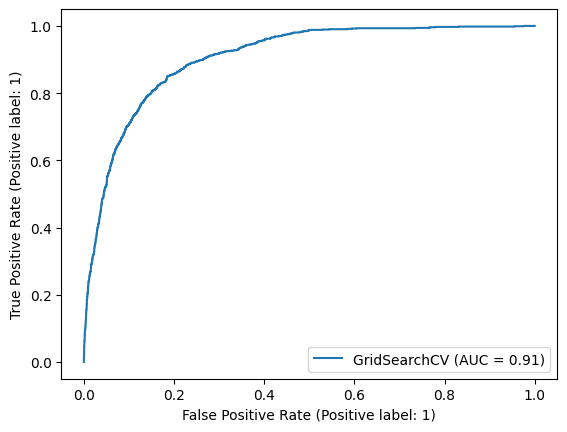

In [151]:
metrics.plot_roc_curve(gcv_lgbmc, x_test, y_test)

### 2. HyperParameter Tuning of CatGBM Classifier

In [155]:
params_cbc = {
    'learning_rate': [0.01,0.05,0.1,0.3],
    'n_estimators': [50,100,250,300,500],
}
cv = StratifiedKFold()
gcv_cbc = GridSearchCV(cbc, params_cbc, cv = cv, n_jobs=-1,verbose=True, scoring = 'roc_auc', error_score=0)
gcv_cbc.fit(x_train_ksmt, y_train_ksmt)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 0.3319673	total: 19.2ms	remaining: 9.6s
1:	learn: 0.2163473	total: 41.8ms	remaining: 10.4s
2:	learn: 0.1689415	total: 62.7ms	remaining: 10.4s
3:	learn: 0.1515588	total: 84.4ms	remaining: 10.5s
4:	learn: 0.1427784	total: 105ms	remaining: 10.4s
5:	learn: 0.1367902	total: 126ms	remaining: 10.3s
6:	learn: 0.1330076	total: 146ms	remaining: 10.3s
7:	learn: 0.1299283	total: 167ms	remaining: 10.3s
8:	learn: 0.1278312	total: 188ms	remaining: 10.3s
9:	learn: 0.1249134	total: 209ms	remaining: 10.3s
10:	learn: 0.1233055	total: 231ms	remaining: 10.3s
11:	learn: 0.1217856	total: 258ms	remaining: 10.5s
12:	learn: 0.1207935	total: 294ms	remaining: 11s
13:	learn: 0.1192887	total: 321ms	remaining: 11.1s
14:	learn: 0.1181734	total: 345ms	remaining: 11.2s
15:	learn: 0.1171548	total: 369ms	remaining: 11.2s
16:	learn: 0.1158764	total: 391ms	remaining: 11.1s
17:	learn: 0.1148563	total: 412ms	remaining: 11s
18:	learn: 0.1137562	total: 436

162:	learn: 0.0689960	total: 3.95s	remaining: 8.16s
163:	learn: 0.0689055	total: 3.97s	remaining: 8.14s
164:	learn: 0.0687323	total: 4s	remaining: 8.13s
165:	learn: 0.0686065	total: 4.03s	remaining: 8.11s
166:	learn: 0.0684381	total: 4.05s	remaining: 8.08s
167:	learn: 0.0682473	total: 4.08s	remaining: 8.05s
168:	learn: 0.0680263	total: 4.1s	remaining: 8.03s
169:	learn: 0.0679646	total: 4.12s	remaining: 8s
170:	learn: 0.0677627	total: 4.15s	remaining: 7.98s
171:	learn: 0.0676148	total: 4.17s	remaining: 7.96s
172:	learn: 0.0674028	total: 4.2s	remaining: 7.94s
173:	learn: 0.0672379	total: 4.23s	remaining: 7.92s
174:	learn: 0.0670929	total: 4.25s	remaining: 7.89s
175:	learn: 0.0669778	total: 4.27s	remaining: 7.87s
176:	learn: 0.0668496	total: 4.3s	remaining: 7.84s
177:	learn: 0.0666889	total: 4.32s	remaining: 7.82s
178:	learn: 0.0665153	total: 4.34s	remaining: 7.79s
179:	learn: 0.0664098	total: 4.37s	remaining: 7.76s
180:	learn: 0.0663287	total: 4.39s	remaining: 7.75s
181:	learn: 0.0662408

321:	learn: 0.0500886	total: 7.94s	remaining: 4.39s
322:	learn: 0.0499341	total: 7.97s	remaining: 4.37s
323:	learn: 0.0498580	total: 8s	remaining: 4.34s
324:	learn: 0.0497324	total: 8.02s	remaining: 4.32s
325:	learn: 0.0496173	total: 8.04s	remaining: 4.29s
326:	learn: 0.0495243	total: 8.06s	remaining: 4.27s
327:	learn: 0.0494371	total: 8.09s	remaining: 4.24s
328:	learn: 0.0493525	total: 8.11s	remaining: 4.21s
329:	learn: 0.0492716	total: 8.13s	remaining: 4.19s
330:	learn: 0.0491391	total: 8.16s	remaining: 4.17s
331:	learn: 0.0490423	total: 8.19s	remaining: 4.14s
332:	learn: 0.0489975	total: 8.21s	remaining: 4.12s
333:	learn: 0.0489395	total: 8.24s	remaining: 4.09s
334:	learn: 0.0488450	total: 8.26s	remaining: 4.07s
335:	learn: 0.0487646	total: 8.28s	remaining: 4.04s
336:	learn: 0.0486570	total: 8.31s	remaining: 4.02s
337:	learn: 0.0485532	total: 8.33s	remaining: 3.99s
338:	learn: 0.0484515	total: 8.35s	remaining: 3.97s
339:	learn: 0.0484231	total: 8.37s	remaining: 3.94s
340:	learn: 0.0

480:	learn: 0.0378385	total: 11.7s	remaining: 463ms
481:	learn: 0.0378099	total: 11.7s	remaining: 439ms
482:	learn: 0.0377285	total: 11.8s	remaining: 414ms
483:	learn: 0.0376580	total: 11.8s	remaining: 390ms
484:	learn: 0.0376452	total: 11.8s	remaining: 365ms
485:	learn: 0.0375782	total: 11.8s	remaining: 341ms
486:	learn: 0.0374900	total: 11.8s	remaining: 316ms
487:	learn: 0.0374011	total: 11.9s	remaining: 292ms
488:	learn: 0.0373119	total: 11.9s	remaining: 267ms
489:	learn: 0.0372304	total: 11.9s	remaining: 243ms
490:	learn: 0.0371928	total: 11.9s	remaining: 219ms
491:	learn: 0.0371458	total: 11.9s	remaining: 194ms
492:	learn: 0.0370786	total: 12s	remaining: 170ms
493:	learn: 0.0370677	total: 12s	remaining: 146ms
494:	learn: 0.0369779	total: 12s	remaining: 121ms
495:	learn: 0.0369074	total: 12s	remaining: 97ms
496:	learn: 0.0368380	total: 12s	remaining: 72.7ms
497:	learn: 0.0367932	total: 12.1s	remaining: 48.4ms
498:	learn: 0.0367611	total: 12.1s	remaining: 24.2ms
499:	learn: 0.036697

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=0,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000262C3E92A40>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'n_estimators': [50, 100, 250, 300, 500]},
             scoring='roc_auc', verbose=True)

In [157]:
gcv_cbc.best_params_

{'learning_rate': 0.3, 'n_estimators': 500}

In [164]:
params_cbc2 = {
    'l2_leaf_reg': [1,3,5,10,100],
    'max_depth': [1,3,5,7,9],
}
cv = StratifiedKFold()
gcv_cbc2 = GridSearchCV(estimator=CatBoostClassifier(learning_rate=0.3, n_estimators=500),
                       param_grid=params_cbc2, cv = cv, n_jobs=-1,verbose=True, scoring = 'roc_auc', error_score=0)
gcv_cbc2.fit(x_train_ksmt, y_train_ksmt)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0:	learn: 0.3574049	total: 9.74ms	remaining: 4.86s
1:	learn: 0.2407083	total: 20.9ms	remaining: 5.19s
2:	learn: 0.1989949	total: 29.3ms	remaining: 4.86s
3:	learn: 0.1818313	total: 39.2ms	remaining: 4.86s
4:	learn: 0.1733518	total: 48.8ms	remaining: 4.83s
5:	learn: 0.1665161	total: 58.1ms	remaining: 4.79s
6:	learn: 0.1627271	total: 69.1ms	remaining: 4.87s
7:	learn: 0.1598673	total: 78.4ms	remaining: 4.82s
8:	learn: 0.1577956	total: 87.9ms	remaining: 4.79s
9:	learn: 0.1554441	total: 98.5ms	remaining: 4.82s
10:	learn: 0.1539467	total: 109ms	remaining: 4.86s
11:	learn: 0.1521330	total: 118ms	remaining: 4.8s
12:	learn: 0.1510090	total: 128ms	remaining: 4.79s
13:	learn: 0.1503086	total: 137ms	remaining: 4.76s
14:	learn: 0.1494594	total: 147ms	remaining: 4.74s
15:	learn: 0.1479443	total: 157ms	remaining: 4.74s
16:	learn: 0.1473903	total: 166ms	remaining: 4.73s
17:	learn: 0.1466876	total: 178ms	remaining: 4.76s
18:	learn: 0.1460031	

173:	learn: 0.1268769	total: 1.68s	remaining: 3.15s
174:	learn: 0.1268488	total: 1.69s	remaining: 3.14s
175:	learn: 0.1268238	total: 1.7s	remaining: 3.13s
176:	learn: 0.1268130	total: 1.71s	remaining: 3.12s
177:	learn: 0.1267796	total: 1.72s	remaining: 3.1s
178:	learn: 0.1267645	total: 1.73s	remaining: 3.09s
179:	learn: 0.1267355	total: 1.73s	remaining: 3.08s
180:	learn: 0.1266967	total: 1.74s	remaining: 3.07s
181:	learn: 0.1266437	total: 1.75s	remaining: 3.06s
182:	learn: 0.1266085	total: 1.76s	remaining: 3.05s
183:	learn: 0.1265738	total: 1.77s	remaining: 3.04s
184:	learn: 0.1265433	total: 1.78s	remaining: 3.03s
185:	learn: 0.1265074	total: 1.79s	remaining: 3.02s
186:	learn: 0.1264812	total: 1.8s	remaining: 3.01s
187:	learn: 0.1264461	total: 1.81s	remaining: 3s
188:	learn: 0.1264171	total: 1.81s	remaining: 2.99s
189:	learn: 0.1263865	total: 1.82s	remaining: 2.98s
190:	learn: 0.1263585	total: 1.83s	remaining: 2.97s
191:	learn: 0.1263289	total: 1.84s	remaining: 2.96s
192:	learn: 0.1263

344:	learn: 0.1237622	total: 3.35s	remaining: 1.51s
345:	learn: 0.1237536	total: 3.36s	remaining: 1.5s
346:	learn: 0.1237444	total: 3.37s	remaining: 1.49s
347:	learn: 0.1237333	total: 3.38s	remaining: 1.48s
348:	learn: 0.1237243	total: 3.39s	remaining: 1.47s
349:	learn: 0.1237145	total: 3.4s	remaining: 1.46s
350:	learn: 0.1237043	total: 3.41s	remaining: 1.45s
351:	learn: 0.1236984	total: 3.42s	remaining: 1.44s
352:	learn: 0.1236895	total: 3.43s	remaining: 1.43s
353:	learn: 0.1236798	total: 3.44s	remaining: 1.42s
354:	learn: 0.1236769	total: 3.45s	remaining: 1.41s
355:	learn: 0.1236692	total: 3.46s	remaining: 1.4s
356:	learn: 0.1236588	total: 3.47s	remaining: 1.39s
357:	learn: 0.1236507	total: 3.48s	remaining: 1.38s
358:	learn: 0.1236403	total: 3.49s	remaining: 1.37s
359:	learn: 0.1236318	total: 3.5s	remaining: 1.36s
360:	learn: 0.1236318	total: 3.51s	remaining: 1.35s
361:	learn: 0.1236230	total: 3.52s	remaining: 1.34s
362:	learn: 0.1236176	total: 3.53s	remaining: 1.33s
363:	learn: 0.12

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=0,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000262DBA18760>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': [1, 3, 5, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9]},
             scoring='roc_auc', verbose=True)

In [165]:
gcv_cbc2.best_params_

{'l2_leaf_reg': 5, 'max_depth': 1}

In [211]:
cbc_final_model= CatBoostClassifier(learning_rate=0.02, n_estimators=900, l2_leaf_reg=4, max_depth=3)
cbc_final_model.fit(x_train_ksmt, y_train_ksmt)

0:	learn: 0.6599762	total: 29.2ms	remaining: 26.3s
1:	learn: 0.6298451	total: 42.9ms	remaining: 19.2s
2:	learn: 0.6003517	total: 54.3ms	remaining: 16.2s
3:	learn: 0.5753904	total: 65.9ms	remaining: 14.8s
4:	learn: 0.5505228	total: 78.9ms	remaining: 14.1s
5:	learn: 0.5273355	total: 92.6ms	remaining: 13.8s
6:	learn: 0.5062042	total: 106ms	remaining: 13.5s
7:	learn: 0.4867335	total: 117ms	remaining: 13.1s
8:	learn: 0.4678795	total: 129ms	remaining: 12.8s
9:	learn: 0.4497799	total: 143ms	remaining: 12.7s
10:	learn: 0.4330685	total: 154ms	remaining: 12.4s
11:	learn: 0.4170814	total: 165ms	remaining: 12.2s
12:	learn: 0.4022425	total: 178ms	remaining: 12.2s
13:	learn: 0.3890101	total: 189ms	remaining: 11.9s
14:	learn: 0.3763949	total: 200ms	remaining: 11.8s
15:	learn: 0.3637421	total: 213ms	remaining: 11.8s
16:	learn: 0.3521547	total: 224ms	remaining: 11.6s
17:	learn: 0.3418461	total: 236ms	remaining: 11.6s
18:	learn: 0.3320853	total: 250ms	remaining: 11.6s
19:	learn: 0.3224250	total: 269ms	r

169:	learn: 0.1379637	total: 2.37s	remaining: 10.2s
170:	learn: 0.1378995	total: 2.39s	remaining: 10.2s
171:	learn: 0.1377766	total: 2.41s	remaining: 10.2s
172:	learn: 0.1376608	total: 2.42s	remaining: 10.2s
173:	learn: 0.1376040	total: 2.44s	remaining: 10.2s
174:	learn: 0.1375209	total: 2.45s	remaining: 10.2s
175:	learn: 0.1374489	total: 2.46s	remaining: 10.1s
176:	learn: 0.1373791	total: 2.48s	remaining: 10.1s
177:	learn: 0.1372799	total: 2.49s	remaining: 10.1s
178:	learn: 0.1372211	total: 2.5s	remaining: 10.1s
179:	learn: 0.1371445	total: 2.51s	remaining: 10.1s
180:	learn: 0.1370914	total: 2.52s	remaining: 10s
181:	learn: 0.1370214	total: 2.54s	remaining: 10s
182:	learn: 0.1369287	total: 2.55s	remaining: 9.99s
183:	learn: 0.1368409	total: 2.56s	remaining: 9.97s
184:	learn: 0.1367386	total: 2.58s	remaining: 9.96s
185:	learn: 0.1366470	total: 2.59s	remaining: 9.95s
186:	learn: 0.1365800	total: 2.61s	remaining: 9.94s
187:	learn: 0.1364901	total: 2.62s	remaining: 9.91s
188:	learn: 0.136

334:	learn: 0.1283403	total: 4.51s	remaining: 7.61s
335:	learn: 0.1283273	total: 4.53s	remaining: 7.6s
336:	learn: 0.1282671	total: 4.54s	remaining: 7.59s
337:	learn: 0.1282446	total: 4.56s	remaining: 7.58s
338:	learn: 0.1282205	total: 4.57s	remaining: 7.57s
339:	learn: 0.1281649	total: 4.59s	remaining: 7.55s
340:	learn: 0.1281344	total: 4.6s	remaining: 7.54s
341:	learn: 0.1280815	total: 4.61s	remaining: 7.52s
342:	learn: 0.1279881	total: 4.62s	remaining: 7.51s
343:	learn: 0.1279294	total: 4.63s	remaining: 7.49s
344:	learn: 0.1278823	total: 4.65s	remaining: 7.47s
345:	learn: 0.1278478	total: 4.66s	remaining: 7.46s
346:	learn: 0.1278329	total: 4.67s	remaining: 7.45s
347:	learn: 0.1277625	total: 4.69s	remaining: 7.44s
348:	learn: 0.1277186	total: 4.7s	remaining: 7.42s
349:	learn: 0.1276791	total: 4.71s	remaining: 7.41s
350:	learn: 0.1276091	total: 4.73s	remaining: 7.39s
351:	learn: 0.1275770	total: 4.75s	remaining: 7.39s
352:	learn: 0.1275554	total: 4.76s	remaining: 7.38s
353:	learn: 0.1

500:	learn: 0.1224562	total: 6.65s	remaining: 5.3s
501:	learn: 0.1223975	total: 6.67s	remaining: 5.29s
502:	learn: 0.1223767	total: 6.68s	remaining: 5.28s
503:	learn: 0.1223295	total: 6.7s	remaining: 5.26s
504:	learn: 0.1222781	total: 6.71s	remaining: 5.25s
505:	learn: 0.1222673	total: 6.72s	remaining: 5.24s
506:	learn: 0.1222156	total: 6.74s	remaining: 5.22s
507:	learn: 0.1221948	total: 6.75s	remaining: 5.21s
508:	learn: 0.1221679	total: 6.76s	remaining: 5.19s
509:	learn: 0.1221445	total: 6.78s	remaining: 5.18s
510:	learn: 0.1221057	total: 6.79s	remaining: 5.17s
511:	learn: 0.1220699	total: 6.8s	remaining: 5.15s
512:	learn: 0.1220491	total: 6.81s	remaining: 5.14s
513:	learn: 0.1220339	total: 6.82s	remaining: 5.12s
514:	learn: 0.1220095	total: 6.83s	remaining: 5.11s
515:	learn: 0.1219885	total: 6.85s	remaining: 5.09s
516:	learn: 0.1219710	total: 6.86s	remaining: 5.08s
517:	learn: 0.1219276	total: 6.88s	remaining: 5.07s
518:	learn: 0.1219127	total: 6.89s	remaining: 5.06s
519:	learn: 0.1

665:	learn: 0.1178803	total: 8.79s	remaining: 3.09s
666:	learn: 0.1178591	total: 8.8s	remaining: 3.08s
667:	learn: 0.1178483	total: 8.82s	remaining: 3.06s
668:	learn: 0.1178364	total: 8.84s	remaining: 3.05s
669:	learn: 0.1178179	total: 8.85s	remaining: 3.04s
670:	learn: 0.1177976	total: 8.86s	remaining: 3.02s
671:	learn: 0.1177708	total: 8.87s	remaining: 3.01s
672:	learn: 0.1177461	total: 8.89s	remaining: 3s
673:	learn: 0.1177348	total: 8.9s	remaining: 2.98s
674:	learn: 0.1176944	total: 8.91s	remaining: 2.97s
675:	learn: 0.1176555	total: 8.92s	remaining: 2.96s
676:	learn: 0.1176431	total: 8.94s	remaining: 2.94s
677:	learn: 0.1176279	total: 8.95s	remaining: 2.93s
678:	learn: 0.1176134	total: 8.96s	remaining: 2.92s
679:	learn: 0.1175952	total: 8.97s	remaining: 2.9s
680:	learn: 0.1175775	total: 8.98s	remaining: 2.89s
681:	learn: 0.1175583	total: 9s	remaining: 2.88s
682:	learn: 0.1175472	total: 9.01s	remaining: 2.86s
683:	learn: 0.1175291	total: 9.03s	remaining: 2.85s
684:	learn: 0.1175109

828:	learn: 0.1145229	total: 10.9s	remaining: 937ms
829:	learn: 0.1144968	total: 11s	remaining: 924ms
830:	learn: 0.1144924	total: 11s	remaining: 911ms
831:	learn: 0.1144749	total: 11s	remaining: 898ms
832:	learn: 0.1144448	total: 11s	remaining: 884ms
833:	learn: 0.1144396	total: 11s	remaining: 871ms
834:	learn: 0.1144270	total: 11s	remaining: 858ms
835:	learn: 0.1143947	total: 11s	remaining: 845ms
836:	learn: 0.1143834	total: 11s	remaining: 832ms
837:	learn: 0.1143611	total: 11.1s	remaining: 818ms
838:	learn: 0.1143403	total: 11.1s	remaining: 805ms
839:	learn: 0.1143351	total: 11.1s	remaining: 792ms
840:	learn: 0.1143252	total: 11.1s	remaining: 779ms
841:	learn: 0.1142940	total: 11.1s	remaining: 766ms
842:	learn: 0.1142727	total: 11.1s	remaining: 752ms
843:	learn: 0.1142586	total: 11.1s	remaining: 739ms
844:	learn: 0.1142530	total: 11.2s	remaining: 726ms
845:	learn: 0.1142283	total: 11.2s	remaining: 713ms
846:	learn: 0.1142147	total: 11.2s	remaining: 700ms
847:	learn: 0.1142091	total:

In [212]:
cbc_auc_score2 = metrics.roc_auc_score(y_test, cbc_final_model.predict_proba(x_test)[:,1])
print("AUCROC Score for CatBoost Classifier:","\n", cbc_auc_score2)

AUCROC Score for CatBoost Classifier: 
 0.9155324054618184


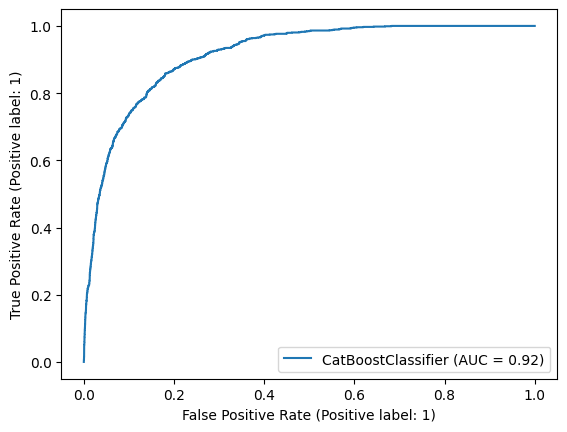

In [215]:
metrics.plot_roc_curve(cbc_final_model, x_test, y_test)

### 3. HyperParameter Tuning of Random Forest Classifier

In [216]:
# HyperParameter Tuning for RandomForest Classifier

params_rf = {
    'max_depth': range(1,11,2),
    'n_estimators': [50,100,200,300,500],
}
cv = StratifiedKFold()
gcv_rf = GridSearchCV(rf_model, params_rf,cv=cv, verbose=True, n_jobs=-1, scoring = 'roc_auc', error_score=0)
gcv_rf.fit(x_train_ksmt, y_train_ksmt)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11, 2),
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='roc_auc', verbose=True)

In [217]:
gcv_rf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=500)

In [219]:
params_rf2 = {
    'min_samples_split': range(3,20,3),
    'min_samples_leaf': range(1,11,2),
}
cv = StratifiedKFold()
gcv_rf2 = GridSearchCV(estimator = RandomForestClassifier(max_depth=9, n_estimators=500),
                            param_grid = params_rf2,cv = cv, verbose=True, n_jobs = -1, scoring = 'roc_auc', error_score=0)
gcv_rf2.fit(x_train_smt, y_train_smt)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=0,
             estimator=RandomForestClassifier(max_depth=9, n_estimators=500),
             n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 11, 2),
                         'min_samples_split': range(3, 20, 3)},
             scoring='roc_auc', verbose=True)

In [220]:
gcv_rf2.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_split=6, n_estimators=500)

In [237]:
rf_final_model = RandomForestClassifier(max_depth=9, n_estimators=700, min_samples_split=6)
rf_final_model.fit(x_train_ksmt, y_train_ksmt)

RandomForestClassifier(max_depth=9, min_samples_split=6, n_estimators=700)

In [238]:
rf2_auc_score = metrics.roc_auc_score(y_test, rf_final_model.predict_proba(x_test)[:,1])
print("AUCROC Score for Random Forest Classifier:","\n", rf2_auc_score)

AUCROC Score for Random Forest Classifier: 
 0.9087181846772019


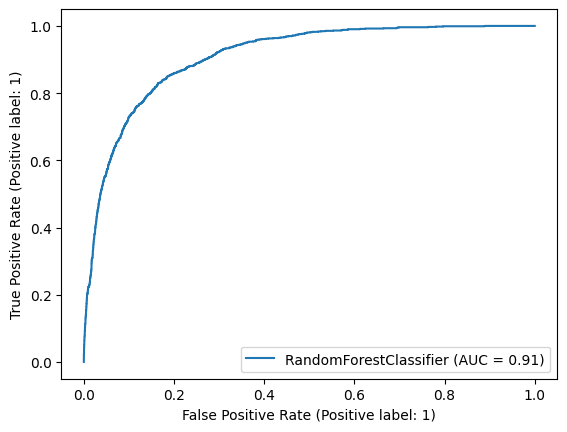

In [239]:
metrics.plot_roc_curve(rf_final_model, x_test, y_test)

## AUC Scored for models

In [248]:
model_scores2 = pd.DataFrame({'Model': ['LightGBM Classifier', 'CatBoost Classifier',  'Random Forest Classifier'],
                            'AUC_Score': [lgbmc_auc_score2*100, cbc_auc_score2*100, rf2_auc_score*100]
                           })
model_scores2.sort_values(by='AUC_Score', ascending = False)

,Model,AUC_Score
1,CatBoost Classifier,91.553241
2,Random Forest Classifier,90.871818
0,LightGBM Classifier,90.597697


### After comparing the models, best performing model is:

### CatBoost Classifier with Hyper Parameter Tuning

In [249]:
cat_boost = CatBoostClassifier(learning_rate=0.02, n_estimators=900, l2_leaf_reg=4, max_depth=3)
cat_boost.fit(x_train_ksmt, y_train_ksmt)

0:	learn: 0.6599762	total: 38.7ms	remaining: 34.8s
1:	learn: 0.6298451	total: 52.5ms	remaining: 23.6s
2:	learn: 0.6003517	total: 64ms	remaining: 19.1s
3:	learn: 0.5753904	total: 75.8ms	remaining: 17s
4:	learn: 0.5505228	total: 88.6ms	remaining: 15.9s
5:	learn: 0.5273355	total: 102ms	remaining: 15.2s
6:	learn: 0.5062042	total: 116ms	remaining: 14.7s
7:	learn: 0.4867335	total: 127ms	remaining: 14.1s
8:	learn: 0.4678795	total: 139ms	remaining: 13.7s
9:	learn: 0.4497799	total: 152ms	remaining: 13.5s
10:	learn: 0.4330685	total: 163ms	remaining: 13.2s
11:	learn: 0.4170814	total: 174ms	remaining: 12.9s
12:	learn: 0.4022425	total: 187ms	remaining: 12.8s
13:	learn: 0.3890101	total: 197ms	remaining: 12.5s
14:	learn: 0.3763949	total: 209ms	remaining: 12.3s
15:	learn: 0.3637421	total: 226ms	remaining: 12.5s
16:	learn: 0.3521547	total: 255ms	remaining: 13.2s
17:	learn: 0.3418461	total: 271ms	remaining: 13.3s
18:	learn: 0.3320853	total: 289ms	remaining: 13.4s
19:	learn: 0.3224250	total: 314ms	remain

174:	learn: 0.1375209	total: 2.63s	remaining: 10.9s
175:	learn: 0.1374489	total: 2.64s	remaining: 10.9s
176:	learn: 0.1373791	total: 2.66s	remaining: 10.9s
177:	learn: 0.1372799	total: 2.68s	remaining: 10.9s
178:	learn: 0.1372211	total: 2.7s	remaining: 10.9s
179:	learn: 0.1371445	total: 2.71s	remaining: 10.8s
180:	learn: 0.1370914	total: 2.73s	remaining: 10.8s
181:	learn: 0.1370214	total: 2.74s	remaining: 10.8s
182:	learn: 0.1369287	total: 2.75s	remaining: 10.8s
183:	learn: 0.1368409	total: 2.77s	remaining: 10.8s
184:	learn: 0.1367386	total: 2.78s	remaining: 10.8s
185:	learn: 0.1366470	total: 2.79s	remaining: 10.7s
186:	learn: 0.1365800	total: 2.81s	remaining: 10.7s
187:	learn: 0.1364901	total: 2.82s	remaining: 10.7s
188:	learn: 0.1363960	total: 2.83s	remaining: 10.7s
189:	learn: 0.1363364	total: 2.85s	remaining: 10.6s
190:	learn: 0.1362113	total: 2.87s	remaining: 10.6s
191:	learn: 0.1361532	total: 2.88s	remaining: 10.6s
192:	learn: 0.1360733	total: 2.9s	remaining: 10.6s
193:	learn: 0.

345:	learn: 0.1278478	total: 4.99s	remaining: 7.99s
346:	learn: 0.1278329	total: 5.01s	remaining: 7.98s
347:	learn: 0.1277625	total: 5.02s	remaining: 7.97s
348:	learn: 0.1277186	total: 5.04s	remaining: 7.96s
349:	learn: 0.1276791	total: 5.05s	remaining: 7.94s
350:	learn: 0.1276091	total: 5.06s	remaining: 7.92s
351:	learn: 0.1275770	total: 5.08s	remaining: 7.91s
352:	learn: 0.1275554	total: 5.09s	remaining: 7.89s
353:	learn: 0.1275332	total: 5.1s	remaining: 7.87s
354:	learn: 0.1275183	total: 5.11s	remaining: 7.85s
355:	learn: 0.1274457	total: 5.13s	remaining: 7.83s
356:	learn: 0.1273786	total: 5.14s	remaining: 7.81s
357:	learn: 0.1273494	total: 5.15s	remaining: 7.79s
358:	learn: 0.1273332	total: 5.16s	remaining: 7.78s
359:	learn: 0.1273176	total: 5.17s	remaining: 7.76s
360:	learn: 0.1272698	total: 5.18s	remaining: 7.74s
361:	learn: 0.1272285	total: 5.2s	remaining: 7.72s
362:	learn: 0.1271964	total: 5.21s	remaining: 7.71s
363:	learn: 0.1271563	total: 5.22s	remaining: 7.69s
364:	learn: 0.

515:	learn: 0.1219885	total: 7.64s	remaining: 5.68s
516:	learn: 0.1219710	total: 7.65s	remaining: 5.67s
517:	learn: 0.1219276	total: 7.67s	remaining: 5.66s
518:	learn: 0.1219127	total: 7.69s	remaining: 5.64s
519:	learn: 0.1218679	total: 7.7s	remaining: 5.63s
520:	learn: 0.1217823	total: 7.71s	remaining: 5.61s
521:	learn: 0.1217423	total: 7.72s	remaining: 5.59s
522:	learn: 0.1217320	total: 7.74s	remaining: 5.58s
523:	learn: 0.1217222	total: 7.76s	remaining: 5.57s
524:	learn: 0.1216922	total: 7.78s	remaining: 5.55s
525:	learn: 0.1216623	total: 7.8s	remaining: 5.55s
526:	learn: 0.1216072	total: 7.82s	remaining: 5.54s
527:	learn: 0.1215823	total: 7.84s	remaining: 5.52s
528:	learn: 0.1215626	total: 7.85s	remaining: 5.51s
529:	learn: 0.1215533	total: 7.87s	remaining: 5.49s
530:	learn: 0.1215305	total: 7.89s	remaining: 5.48s
531:	learn: 0.1215106	total: 7.9s	remaining: 5.46s
532:	learn: 0.1214874	total: 7.91s	remaining: 5.45s
533:	learn: 0.1214790	total: 7.92s	remaining: 5.43s
534:	learn: 0.1

675:	learn: 0.1176555	total: 9.97s	remaining: 3.3s
676:	learn: 0.1176431	total: 9.98s	remaining: 3.29s
677:	learn: 0.1176279	total: 10s	remaining: 3.27s
678:	learn: 0.1176134	total: 10s	remaining: 3.26s
679:	learn: 0.1175952	total: 10s	remaining: 3.24s
680:	learn: 0.1175775	total: 10s	remaining: 3.23s
681:	learn: 0.1175583	total: 10.1s	remaining: 3.21s
682:	learn: 0.1175472	total: 10.1s	remaining: 3.2s
683:	learn: 0.1175291	total: 10.1s	remaining: 3.18s
684:	learn: 0.1175109	total: 10.1s	remaining: 3.17s
685:	learn: 0.1174719	total: 10.1s	remaining: 3.15s
686:	learn: 0.1174567	total: 10.1s	remaining: 3.13s
687:	learn: 0.1173884	total: 10.1s	remaining: 3.12s
688:	learn: 0.1173666	total: 10.1s	remaining: 3.1s
689:	learn: 0.1173458	total: 10.2s	remaining: 3.09s
690:	learn: 0.1173257	total: 10.2s	remaining: 3.07s
691:	learn: 0.1173010	total: 10.2s	remaining: 3.06s
692:	learn: 0.1172842	total: 10.2s	remaining: 3.05s
693:	learn: 0.1172724	total: 10.2s	remaining: 3.03s
694:	learn: 0.1172569	t

837:	learn: 0.1143611	total: 12.1s	remaining: 897ms
838:	learn: 0.1143403	total: 12.1s	remaining: 882ms
839:	learn: 0.1143351	total: 12.2s	remaining: 868ms
840:	learn: 0.1143252	total: 12.2s	remaining: 854ms
841:	learn: 0.1142940	total: 12.2s	remaining: 839ms
842:	learn: 0.1142727	total: 12.2s	remaining: 825ms
843:	learn: 0.1142586	total: 12.2s	remaining: 810ms
844:	learn: 0.1142530	total: 12.2s	remaining: 796ms
845:	learn: 0.1142283	total: 12.2s	remaining: 781ms
846:	learn: 0.1142147	total: 12.2s	remaining: 766ms
847:	learn: 0.1142091	total: 12.3s	remaining: 752ms
848:	learn: 0.1141970	total: 12.3s	remaining: 737ms
849:	learn: 0.1141916	total: 12.3s	remaining: 723ms
850:	learn: 0.1141657	total: 12.3s	remaining: 708ms
851:	learn: 0.1141413	total: 12.3s	remaining: 693ms
852:	learn: 0.1141124	total: 12.3s	remaining: 679ms
853:	learn: 0.1141041	total: 12.3s	remaining: 664ms
854:	learn: 0.1140977	total: 12.4s	remaining: 650ms
855:	learn: 0.1140915	total: 12.4s	remaining: 636ms
856:	learn: 

In [256]:
cbc_auc_score2 = metrics.roc_auc_score(y_test, cbc_final_model.predict_proba(x_test)[:,1])
print("AUCROC Score of CatBoost Classifier: ", "\n", cbc_auc_score2)

AUCROC Score of CatBoost Classifier:  
 0.9155324054618184


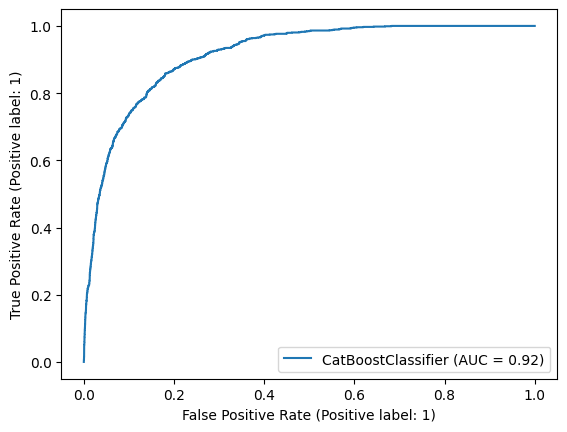

In [261]:
metrics.plot_roc_curve(cat_boost, x_test, y_test)

In [268]:
rf_final_model.feature_importances_

array([0.00825817, 0.0147026 , 0.00533273, 0.06057689, 0.00909969,
       0.03395432, 0.06965258, 0.02213139, 0.00045192, 0.00061137,
       0.00082843, 0.03495219, 0.01028795, 0.45084379, 0.27831599])

## Feature Importances

In [269]:
#model_rf.feature_importances_
#xgbc_fin.feature_importances_
rf_final_model.feature_importances_

array([0.00825817, 0.0147026 , 0.00533273, 0.06057689, 0.00909969,
       0.03395432, 0.06965258, 0.02213139, 0.00045192, 0.00061137,
       0.00082843, 0.03495219, 0.01028795, 0.45084379, 0.27831599])

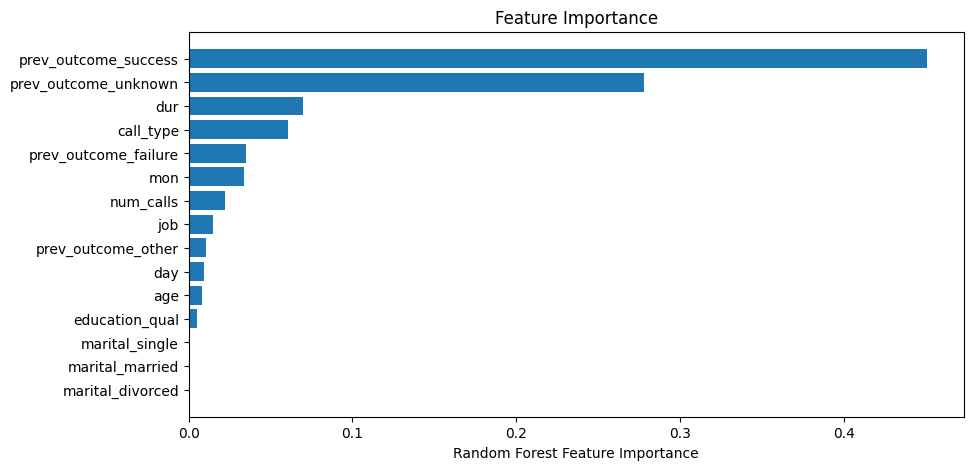

In [273]:
sorted_idx = rf_final_model.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_new.columns[sorted_idx], rf_final_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()